# Load all the things

In [68]:
import numpy as np
from model.environment import train_trajs, train_traj_ids, load_seg, seg_normalisers, hyperparams
from model.environment import f_p_sigma_n, f_v_sigma_n, delta_xy, delta_p, delta_v
from model.trajectory_model import learn_model, plot_model

%load_ext autoreload
%autoreload 2
%matplotlib inline

np.random.seed(1)
# What to load
route_n = 3
seg_n = 6 # 1-indexed
train_traj_n = 0 # 0-indexed
train_traj_id = train_traj_ids[train_traj_n]
seg = load_seg(train_trajs, seg_n, train_traj_id)
normaliser = seg_normalisers[seg_n]

scaled_f_p_sigma_n =  f_p_sigma_n / normaliser.p_scale  # meters
scaled_f_v_sigma_n = f_v_sigma_n / normaliser.v_scale # m/s
g_sigma_n = .0001 # tau is deterministic
h_sigma_n = 1 # seconds
scaled_delta_xy = delta_xy / normaliser.p_scale    # metres, spatial cluster width
scaled_delta_p = delta_p / normaliser.p_scale # metres, p cluster width
scaled_delta_v = delta_v / normaliser.v_scale   # metres/second, v cluster widt
print('learning', train_traj_id)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
learning 2


## Use randomly trained models

## Emprical distribution

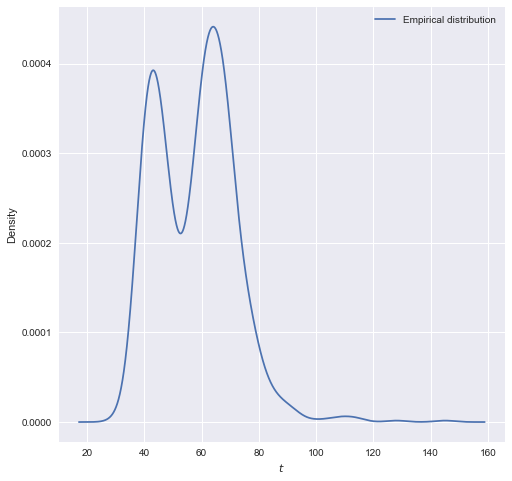

In [10]:
from scipy.stats import gaussian_kde
from model.trajectory_model import trajectory_arrival_time_prior
from model.experiments import prior_density_from_params, seg_travel_times, grid_for
from model.evaluate import hellinger2, js_divergence
from model.plotting import plot_grid

n_models_to_train = 25
n_trajs_to_use = 100

seg = train_trajs[train_trajs.seg == seg_n]
traj_ids = seg.traj.unique()[:n_trajs_to_use]
time_lefts = seg_travel_times(seg)
xx = grid_for(time_lefts, 10000)
empirical_distribution = gaussian_kde(time_lefts)(xx)
empirical_distribution = empirical_distribution / empirical_distribution.sum()

_, ax = plot_grid(1, 1)
ax.plot(xx, empirical_distribution, label='Empirical distribution')
ax.set_xlabel(r'$t$')
ax.set_ylabel('Density')
ax.legend()


## Learn trajectories with worst prediction performance

In [65]:
from model.experiments import learn_trajectories_by_strategy
n_models_to_train = 50
n_trajs_to_use = 100
def learn_by_strat(strat, fraction_observed):
    return learn_trajectories_by_strategy(
        seg_n=seg_n,
        n_models_to_train=n_models_to_train,
        n_trajs_to_use=n_trajs_to_use, 
        strategy=strat,
        fraction_observed=fraction_observed
    )

### Learn by maximum MAE

Currently, the model gets confused after a while and adds the same trajectory ad infinium

In [93]:
from model.storage import save_pickle

largest_mae = lambda maes, _: maes.argmax()
mm_model, mm_hel_dists, mm_js_divs, mm_maes, mm_likelihoods = learn_by_strat(largest_mae, fraction_observed=.5)
save_pickle('maximum-mae-result', (mm_model, mm_hel_dists, mm_js_divs, mm_maes, mm_likelihoods))

Optimization restart 1/3, f = -215.72413643769187
Optimization restart 2/3, f = -215.7241364392747
Optimization restart 3/3, f = -215.72413644495788
Optimization restart 1/3, f = -226.33184448517744
Optimization restart 2/3, f = -226.33184448814163
Optimization restart 3/3, f = -226.33184448671986
Optimization restart 1/3, f = -226.32960514541188
Optimization restart 2/3, f = -226.32960514214483
Optimization restart 3/3, f = -226.3296051558783
Optimization restart 1/3, f = -206.77909834580717
Optimization restart 2/3, f = -206.77909834565776
Optimization restart 3/3, f = -206.77909834594564
Optimization restart 1/3, f = -216.38783631375793
Optimization restart 2/3, f = -216.38783631102103
Optimization restart 3/3, f = -216.38783631412025
Optimization restart 1/3, f = -216.31624259217443
Optimization restart 2/3, f = -216.31624259207348
Optimization restart 3/3, f = -216.31624259253653
Optimization restart 1/3, f = -12.985083626214823
Optimization restart 2/3, f = -12.985083625511923
Op






  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

worst traj 274 max mae 22.217005342537732 min likelihood -3273.2181983997607
Optimization restart 1/3, f = -70.46254453237404
Optimization restart 2/3, f = -70.46254453208135
Optimization restart 3/3, f = -70.46254453222747
Optimization restart 1/3, f = -70.88617150679805
Optimization restart 2/3, f = -70.886171506229
Optimization restart 3/3, f = -70.88617150676595
Optimization restart 1/3, f = -70.89149234823572
Optimization restart 2/3, f = -70.89149234798367
Optimization restart 3/3, f = -70.89149234801596
Optimization restart 1/3, f = -91.58110172958783
Optimization restart 2/3, f = -91.58110172954535
Optimization restart 3/3, f = -91.58110172960198
Optimization restart 1/3, f = -94.09311044198728
Optimization restart 2/3, f = -94.09311044217881
Optimization restart 3/3, f = -94.09311043990044
Optimization restart 1/3, f = -94.09737808119559
Optimization restart 2/3, f = -94.09737808058657
Optimization restart 3/3, f = -94.09737808076562
Optimization restart 1/3, f = -3.9679214426






  3%|██▊                                                                                | 1/29 [00:15<07:12, 15.46s/it]

worst traj 147 max mae 24.586219437426582 min likelihood -2159.8919674195536
Optimization restart 1/3, f = -187.44877190024548
Optimization restart 2/3, f = -187.44877191663744
Optimization restart 3/3, f = -187.44877186248692
Optimization restart 1/3, f = -188.60187609088754
Optimization restart 2/3, f = -188.60187602835498
Optimization restart 3/3, f = -188.60187607976948
Optimization restart 1/3, f = -188.59934316931958
Optimization restart 2/3, f = -188.5993431694915
Optimization restart 3/3, f = -188.59934308268407
Optimization restart 1/3, f = -199.21309372724465
Optimization restart 2/3, f = -199.21309374746147
Optimization restart 3/3, f = -199.21309374362582
Optimization restart 1/3, f = -205.35531290867817
Optimization restart 2/3, f = -205.3553128974708
Optimization restart 3/3, f = -205.3553128986636
Optimization restart 1/3, f = -205.34366872646078
Optimization restart 2/3, f = -205.34366872426614
Optimization restart 3/3, f = -205.3436687343027
Optimization restart 1/3, f






  7%|█████▋                                                                             | 2/29 [00:43<08:35, 19.11s/it]

worst traj 180 max mae 23.165028828770623 min likelihood -748.8824002713236
Optimization restart 1/3, f = -163.57716439396552
Optimization restart 2/3, f = -163.57716438975544
Optimization restart 3/3, f = -163.57716438873075
Optimization restart 1/3, f = -167.1515829541281
Optimization restart 2/3, f = -167.15158295252903
Optimization restart 3/3, f = -167.1515829557287
Optimization restart 1/3, f = -167.15113496304718
Optimization restart 2/3, f = -167.15113496015303
Optimization restart 3/3, f = -167.1511349659886
Optimization restart 1/3, f = -206.81515300201124
Optimization restart 2/3, f = -206.81515300626484
Optimization restart 3/3, f = -206.8151530079424
Optimization restart 1/3, f = -213.86010900606485
Optimization restart 2/3, f = -213.8601090080164
Optimization restart 3/3, f = -213.86010900424037
Optimization restart 1/3, f = -213.82643391153343
Optimization restart 2/3, f = -213.82643391232742
Optimization restart 3/3, f = -213.82643390448948
Optimization restart 1/3, f =






 10%|████████▌                                                                          | 3/29 [01:13<09:46, 22.56s/it]

worst traj 144 max mae 13.967178945005564 min likelihood -748.8824002713236
Optimization restart 1/3, f = -136.82735520252493
Optimization restart 2/3, f = -136.8273551991087
Optimization restart 3/3, f = -136.8273551969588
Optimization restart 1/3, f = -138.19469415373132
Optimization restart 2/3, f = -138.19469415673206
Optimization restart 3/3, f = -138.19469415652802
Optimization restart 1/3, f = -138.19233218055024
Optimization restart 2/3, f = -138.19233217514667
Optimization restart 3/3, f = -138.19233218035023
Optimization restart 1/3, f = -156.28846248722238
Optimization restart 2/3, f = -156.288462484634
Optimization restart 3/3, f = -156.28846248535956
Optimization restart 1/3, f = -161.3045888817548
Optimization restart 2/3, f = -161.304588878936
Optimization restart 3/3, f = -161.30458888220954
Optimization restart 1/3, f = -161.26394589471118
Optimization restart 2/3, f = -161.26394589385836
Optimization restart 3/3, f = -161.26394589409205
Optimization restart 1/3, f = 6






 14%|███████████▍                                                                       | 4/29 [01:53<11:33, 27.74s/it]

worst traj 303 max mae 13.798833471170546 min likelihood -748.8824002713236
Optimization restart 1/3, f = -126.64489450565934
Optimization restart 2/3, f = -126.64489452009028
Optimization restart 3/3, f = -126.6448945083454
Optimization restart 1/3, f = -130.86277883500406
Optimization restart 2/3, f = -130.86277884644153
Optimization restart 3/3, f = -130.8627788359147
Optimization restart 1/3, f = -130.8598519236746
Optimization restart 2/3, f = -130.85985190432154
Optimization restart 3/3, f = -130.85985191527885
Optimization restart 1/3, f = -148.77639295635524
Optimization restart 2/3, f = -148.77639294474838
Optimization restart 3/3, f = -148.77639295301427
Optimization restart 1/3, f = -153.25867943600662
Optimization restart 2/3, f = -153.25867942990595
Optimization restart 3/3, f = -153.25867943688658
Optimization restart 1/3, f = -153.2408501561465
Optimization restart 2/3, f = -153.24085016192987
Optimization restart 3/3, f = -153.24085015069363
Optimization restart 1/3, f 






 17%|██████████████▎                                                                    | 5/29 [02:41<13:34, 33.92s/it]

worst traj 222 max mae 13.459845548418706 min likelihood -748.8824002713236
Optimization restart 1/3, f = -140.66462466168568
Optimization restart 2/3, f = -140.66462466040224
Optimization restart 3/3, f = -140.66462465665552
Optimization restart 1/3, f = -143.22079589758465
Optimization restart 2/3, f = -143.22079590224985
Optimization restart 3/3, f = -143.22079590033937
Optimization restart 1/3, f = -143.21932213662978
Optimization restart 2/3, f = -143.21932213238347
Optimization restart 3/3, f = -143.21932212958998
Optimization restart 1/3, f = -158.945062461557
Optimization restart 2/3, f = -158.94506246064867
Optimization restart 3/3, f = -158.94506244511248
Optimization restart 1/3, f = -164.10342930838982
Optimization restart 2/3, f = -164.10342929218604
Optimization restart 3/3, f = -164.10342930925256
Optimization restart 1/3, f = -164.06310271656633
Optimization restart 2/3, f = -164.0631027128038
Optimization restart 3/3, f = -164.06310270031747
Optimization restart 1/3, f






 21%|█████████████████▏                                                                 | 6/29 [03:39<15:44, 41.05s/it]

worst traj 176 max mae 13.052159154806382 min likelihood -748.8824002713236
Optimization restart 1/3, f = -136.4900560415188
Optimization restart 2/3, f = -136.49005605423287
Optimization restart 3/3, f = -136.4900560535094
Optimization restart 1/3, f = -139.03615097262835
Optimization restart 2/3, f = -139.036150983162
Optimization restart 3/3, f = -139.0361509826345
Optimization restart 1/3, f = -139.03246191757404
Optimization restart 2/3, f = -139.03246190409587
Optimization restart 3/3, f = -139.03246191604563
Optimization restart 1/3, f = -144.09211271890732
Optimization restart 2/3, f = -144.09211271807092
Optimization restart 3/3, f = -144.0921126878648
Optimization restart 1/3, f = -152.2624893429043
Optimization restart 2/3, f = -152.2624893374449
Optimization restart 3/3, f = -152.26248933742332
Optimization restart 1/3, f = -152.2365954853282
Optimization restart 2/3, f = -152.23659548506086
Optimization restart 3/3, f = -152.23659548715457
Optimization restart 1/3, f = -45






 24%|████████████████████                                                               | 7/29 [04:45<17:46, 48.48s/it]

worst traj 100 max mae 12.409671697784503 min likelihood -748.8824002713236
Optimization restart 1/3, f = -105.9516670679856
Optimization restart 2/3, f = -105.951667068098
Optimization restart 3/3, f = -105.95166705632303
Optimization restart 1/3, f = -107.04209119338387
Optimization restart 2/3, f = -107.04209119409978
Optimization restart 3/3, f = -107.04209119378251
Optimization restart 1/3, f = -107.0398436394126
Optimization restart 2/3, f = -107.03984363810986
Optimization restart 3/3, f = -107.03984362360211
Optimization restart 1/3, f = -129.9590597488545
Optimization restart 2/3, f = -129.95905974909726
Optimization restart 3/3, f = -129.9590597488202
Optimization restart 1/3, f = -133.50992278107773
Optimization restart 2/3, f = -133.5099227817689
Optimization restart 3/3, f = -133.50992278140677
Optimization restart 1/3, f = -133.44809749859962
Optimization restart 2/3, f = -133.44809749876885
Optimization restart 3/3, f = -133.4480974984505
Optimization restart 1/3, f = -1






 28%|██████████████████████▉                                                            | 8/29 [05:58<19:30, 55.75s/it]

worst traj 378 max mae 12.054105241630388 min likelihood -581.3470994816067
Optimization restart 1/3, f = -140.7640880769161
Optimization restart 2/3, f = -140.76408807967087
Optimization restart 3/3, f = -140.76408808058864
Optimization restart 1/3, f = -143.2885593331323
Optimization restart 2/3, f = -143.2885593305108
Optimization restart 3/3, f = -143.28855933120002
Optimization restart 1/3, f = -143.28512064948634
Optimization restart 2/3, f = -143.28512064856253
Optimization restart 3/3, f = -143.28512064942322
Optimization restart 1/3, f = -166.89834042326612
Optimization restart 2/3, f = -166.8983404226398
Optimization restart 3/3, f = -166.89834042321075
Optimization restart 1/3, f = -173.10935216109837
Optimization restart 2/3, f = -173.10935216153817
Optimization restart 3/3, f = -173.10935216220778
Optimization restart 1/3, f = -173.06774049442672
Optimization restart 2/3, f = -173.0677404914338
Optimization restart 3/3, f = -173.06774049361366
Optimization restart 1/3, f =






 31%|█████████████████████████▊                                                         | 9/29 [07:21<21:20, 64.00s/it]

learned same traj again 378


PicklingError: Can't pickle <class 'model.seg_model.SegmentModel'>: it's not the same object as model.seg_model.SegmentModel

<Figure size 576x576 with 1 Axes>

In [96]:
save_pickle('maximum-mae-result', (mm_model, mm_hel_dists, mm_js_divs, mm_maes, mm_likelihoods))

PicklingError: Can't pickle <class 'model.seg_model.SegmentModel'>: it's not the same object as model.seg_model.SegmentModel

### Learn by minimum likelihood

Optimization restart 1/3, f = -215.72413643627985
Optimization restart 2/3, f = -215.72413643787655
Optimization restart 3/3, f = -215.72413643972314
Optimization restart 1/3, f = -226.33187732736766
Optimization restart 2/3, f = -226.3318773214609
Optimization restart 3/3, f = -226.33187731942644
Optimization restart 1/3, f = -226.32963797842262
Optimization restart 2/3, f = -226.32963795955652
Optimization restart 3/3, f = -226.32963799149735
Optimization restart 1/3, f = -206.77909834560964
Optimization restart 2/3, f = -206.77909834579802
Optimization restart 3/3, f = -206.77909834443548
Optimization restart 1/3, f = -216.38785992304372
Optimization restart 2/3, f = -216.38785992385044
Optimization restart 3/3, f = -216.38785992341013
Optimization restart 1/3, f = -216.31626621351495
Optimization restart 2/3, f = -216.3162662130296
Optimization restart 3/3, f = -216.3162662129786
Optimization restart 1/3, f = -12.985083626214823
Optimization restart 2/3, f = -12.985083626211619
Opt






  0%|                                                                                           | 0/29 [00:00<?, ?it/s]

worst traj 299 max mae 22.21714831319826 min likelihood -3273.2877190869076
Optimization restart 1/3, f = -131.77061402969593
Optimization restart 2/3, f = -131.77061404020026
Optimization restart 3/3, f = -131.77061402840906
Optimization restart 1/3, f = -135.3761762035855
Optimization restart 2/3, f = -135.37617619045008
Optimization restart 3/3, f = -135.37617620537247
Optimization restart 1/3, f = -135.37240516771246
Optimization restart 2/3, f = -135.3724051518896
Optimization restart 3/3, f = -135.37240515692895
Optimization restart 1/3, f = -148.7022444029572
Optimization restart 2/3, f = -148.70224440413966
Optimization restart 3/3, f = -148.70224439740264
Optimization restart 1/3, f = -157.30342125411568
Optimization restart 2/3, f = -157.30342120675735
Optimization restart 3/3, f = -157.30342124338014
Optimization restart 1/3, f = -157.27964882297994
Optimization restart 2/3, f = -157.27964882596132
Optimization restart 3/3, f = -157.27964882045725
Optimization restart 1/3, f






  3%|██▊                                                                                | 1/29 [00:13<06:16, 13.44s/it]

worst traj 384 max mae 22.21313937555022 min likelihood -1393.68596713485
Optimization restart 1/3, f = -199.9807288054361
Optimization restart 2/3, f = -199.980728803511
Optimization restart 3/3, f = -199.98072883569773
Optimization restart 1/3, f = -205.62348000030488
Optimization restart 2/3, f = -205.62348002074015
Optimization restart 3/3, f = -205.62347999896872
Optimization restart 1/3, f = -205.62004328058757
Optimization restart 2/3, f = -205.62004327665323
Optimization restart 3/3, f = -205.62004329029423
Optimization restart 1/3, f = -216.07327482040827
Optimization restart 2/3, f = -216.07327482686117
Optimization restart 3/3, f = -216.07327482257728
Optimization restart 1/3, f = -222.514402300393
Optimization restart 2/3, f = -222.514402318372
Optimization restart 3/3, f = -222.51440231818717
Optimization restart 1/3, f = -222.48955342445748
Optimization restart 2/3, f = -222.4895534678354
Optimization restart 3/3, f = -222.48955347130382
Optimization restart 1/3, f = -74.






  7%|█████▋                                                                             | 2/29 [00:35<07:13, 16.04s/it]

worst traj 15 max mae 22.203798179487656 min likelihood -1385.0421680683926
Optimization restart 1/3, f = -129.08373131904722
Optimization restart 2/3, f = -129.0837313200142
Optimization restart 3/3, f = -129.08373131822026
Optimization restart 1/3, f = -131.10375264117675
Optimization restart 2/3, f = -131.10375264194732
Optimization restart 3/3, f = -131.10375263517125
Optimization restart 1/3, f = -131.1033028746904
Optimization restart 2/3, f = -131.10330287536908
Optimization restart 3/3, f = -131.10330287329867
Optimization restart 1/3, f = -142.09743871216108
Optimization restart 2/3, f = -142.0974387121095
Optimization restart 3/3, f = -142.0974387121542
Optimization restart 1/3, f = -146.00179929144102
Optimization restart 2/3, f = -146.0017992914687
Optimization restart 3/3, f = -146.00179929104468
Optimization restart 1/3, f = -145.9346773777511
Optimization restart 2/3, f = -145.93467737757226
Optimization restart 3/3, f = -145.93467737777536
Optimization restart 1/3, f = 






 10%|████████▌                                                                          | 3/29 [01:09<09:19, 21.53s/it]

worst traj 322 max mae 13.186520017797129 min likelihood -414.02198973138445
Optimization restart 1/3, f = -144.2185020322878
Optimization restart 2/3, f = -144.2185020329817
Optimization restart 3/3, f = -144.218502033401
Optimization restart 1/3, f = -146.69518800674692
Optimization restart 2/3, f = -146.69518800960995
Optimization restart 3/3, f = -146.69518797374676
Optimization restart 1/3, f = -146.69791534178248
Optimization restart 2/3, f = -146.69791534453506
Optimization restart 3/3, f = -146.6979153428737
Optimization restart 1/3, f = -167.7932510869337
Optimization restart 2/3, f = -167.79325108746266
Optimization restart 3/3, f = -167.79325108756106
Optimization restart 1/3, f = -172.43524129642114
Optimization restart 2/3, f = -172.435241296303
Optimization restart 3/3, f = -172.43524129656748
Optimization restart 1/3, f = -172.37316794158932
Optimization restart 2/3, f = -172.37316794142342
Optimization restart 3/3, f = -172.37316794179353
Optimization restart 1/3, f = -






 14%|███████████▍                                                                       | 4/29 [01:49<11:13, 26.96s/it]

worst traj 34 max mae 17.293275117162786 min likelihood -357.55646280744315
Optimization restart 1/3, f = -158.73022803494985
Optimization restart 2/3, f = -158.7302280320539
Optimization restart 3/3, f = -158.73022806259033
Optimization restart 1/3, f = -163.16049886544857
Optimization restart 2/3, f = -163.16049886348588
Optimization restart 3/3, f = -163.1604989010592
Optimization restart 1/3, f = -163.15782432860578
Optimization restart 2/3, f = -163.1578243496911
Optimization restart 3/3, f = -163.15782435400294
Optimization restart 1/3, f = -173.93166255304124
Optimization restart 2/3, f = -173.93166255144632
Optimization restart 3/3, f = -173.93166252863588
Optimization restart 1/3, f = -179.9289274924614
Optimization restart 2/3, f = -179.92892749277686
Optimization restart 3/3, f = -179.92892749437914
Optimization restart 1/3, f = -179.9076794642453
Optimization restart 2/3, f = -179.90767979904325
Optimization restart 3/3, f = -179.90767980026146
Optimization restart 1/3, f =






 17%|██████████████▎                                                                    | 5/29 [02:36<13:12, 33.03s/it]

worst traj 250 max mae 17.293275117162786 min likelihood -282.4565123188482
Optimization restart 1/3, f = -145.72185400864714
Optimization restart 2/3, f = -145.72185400434705
Optimization restart 3/3, f = -145.72185400809738
Optimization restart 1/3, f = -148.41742628753607
Optimization restart 2/3, f = -148.41742628271896
Optimization restart 3/3, f = -148.4174262851885
Optimization restart 1/3, f = -148.4138448137357
Optimization restart 2/3, f = -148.4138447386251
Optimization restart 3/3, f = -148.41384481324187
Optimization restart 1/3, f = -174.87545021781324
Optimization restart 2/3, f = -174.87545021823613
Optimization restart 3/3, f = -174.87545021713467
Optimization restart 1/3, f = -184.0903531438753
Optimization restart 2/3, f = -184.09035314408635
Optimization restart 3/3, f = -184.09035314411338
Optimization restart 1/3, f = -184.03231815496625
Optimization restart 2/3, f = -184.0323181575568
Optimization restart 3/3, f = -184.03231815706408
Optimization restart 1/3, f =






 21%|█████████████████▏                                                                 | 6/29 [03:33<15:22, 40.11s/it]

worst traj 371 max mae 17.293275117162786 min likelihood -166.57431978892686
Optimization restart 1/3, f = -208.1989806381585
Optimization restart 2/3, f = -208.1989806388736
Optimization restart 3/3, f = -208.1989806425721
Optimization restart 1/3, f = -212.93397668179975
Optimization restart 2/3, f = -212.9339766828769
Optimization restart 3/3, f = -212.93397668512546
Optimization restart 1/3, f = -212.93207472349746
Optimization restart 2/3, f = -212.9320747140115
Optimization restart 3/3, f = -212.93207472151622
Optimization restart 1/3, f = -235.65852891392143
Optimization restart 2/3, f = -235.65852890539534
Optimization restart 3/3, f = -235.65852891352756
Optimization restart 1/3, f = -245.59881262869987
Optimization restart 2/3, f = -245.5988126291616
Optimization restart 3/3, f = -245.5988126289329
Optimization restart 1/3, f = -245.55092392639472
Optimization restart 2/3, f = -245.5509239269526
Optimization restart 3/3, f = -245.55092392515976
Optimization restart 1/3, f = -






 24%|████████████████████                                                               | 7/29 [04:37<17:21, 47.32s/it]

worst traj 274 max mae 17.293275117164697 min likelihood -124.24827183506417
Optimization restart 1/3, f = -70.46254453222156
Optimization restart 2/3, f = -70.46254453223376
Optimization restart 3/3, f = -70.46254453228198
Optimization restart 1/3, f = -70.88617225090849
Optimization restart 2/3, f = -70.88617225085747
Optimization restart 3/3, f = -70.88617225068322
Optimization restart 1/3, f = -70.89149309226065
Optimization restart 2/3, f = -70.89149307240707
Optimization restart 3/3, f = -70.891493091987
Optimization restart 1/3, f = -91.58110172961048
Optimization restart 2/3, f = -91.58110172419266
Optimization restart 3/3, f = -91.58110172960359
Optimization restart 1/3, f = -94.09310799663287
Optimization restart 2/3, f = -94.09310799641867
Optimization restart 3/3, f = -94.09310799661299
Optimization restart 1/3, f = -94.09737563545774
Optimization restart 2/3, f = -94.09737563549382
Optimization restart 3/3, f = -94.09737563551934
Optimization restart 1/3, f = -3.9679214426






 28%|██████████████████████▉                                                            | 8/29 [05:51<19:22, 55.34s/it]

worst traj 290 max mae 9.225366248397226 min likelihood -111.55209542963917
Optimization restart 1/3, f = -205.24332959499083
Optimization restart 2/3, f = -205.24332956398277
Optimization restart 3/3, f = -205.24332958292774
Optimization restart 1/3, f = -214.37288631769738
Optimization restart 2/3, f = -214.37288630135137
Optimization restart 3/3, f = -214.37288633971795
Optimization restart 1/3, f = -214.36928074734368
Optimization restart 2/3, f = -214.369280719604
Optimization restart 3/3, f = -214.3692807425394
Optimization restart 1/3, f = -222.0713224478946
Optimization restart 2/3, f = -222.07132245035086
Optimization restart 3/3, f = -222.0713224536791
Optimization restart 1/3, f = -231.53572912681602
Optimization restart 2/3, f = -231.53572913662708
Optimization restart 3/3, f = -231.53572913621957
Optimization restart 1/3, f = -231.5086197938036
Optimization restart 2/3, f = -231.50861979465546
Optimization restart 3/3, f = -231.50861979033232
Optimization restart 1/3, f = 






 31%|█████████████████████████▊                                                         | 9/29 [07:13<21:04, 63.24s/it]

worst traj 261 max mae 9.225366248397226 min likelihood -81.55736092044584
Optimization restart 1/3, f = -164.62953429986618
Optimization restart 2/3, f = -164.62953436002152
Optimization restart 3/3, f = -164.62953440387756
Optimization restart 1/3, f = -165.3859170467146
Optimization restart 2/3, f = -165.38591707371071
Optimization restart 3/3, f = -165.38591703574454
Optimization restart 1/3, f = -165.38360698653364
Optimization restart 2/3, f = -165.38360706702383
Optimization restart 3/3, f = -165.38360707755797
Optimization restart 1/3, f = -172.3495273982449
Optimization restart 2/3, f = -172.34952739289557
Optimization restart 3/3, f = -172.3495274074405
Optimization restart 1/3, f = -175.78195480996774
Optimization restart 2/3, f = -175.78195481023067
Optimization restart 3/3, f = -175.78195479675492
Optimization restart 1/3, f = -175.767983146787
Optimization restart 2/3, f = -175.767983126875
Optimization restart 3/3, f = -175.76798313053234
Optimization restart 1/3, f = -5






 34%|████████████████████████████▎                                                     | 10/29 [08:44<22:39, 71.54s/it]

worst traj 19 max mae 9.225366248397226 min likelihood -81.51350893405125
Optimization restart 1/3, f = -155.6069733346291
Optimization restart 2/3, f = -155.60697332054204
Optimization restart 3/3, f = -155.6069733267543
Optimization restart 1/3, f = -159.97171691368195
Optimization restart 2/3, f = -159.97171691608634
Optimization restart 3/3, f = -159.97171692506973
Optimization restart 1/3, f = -159.96968418320964
Optimization restart 2/3, f = -159.96968417178905
Optimization restart 3/3, f = -159.9696841808024
Optimization restart 1/3, f = -167.3709624062653
Optimization restart 2/3, f = -167.37096240715329
Optimization restart 3/3, f = -167.37096240566368
Optimization restart 1/3, f = -174.0505061475009
Optimization restart 2/3, f = -174.05050614803062
Optimization restart 3/3, f = -174.05050614713446
Optimization restart 1/3, f = -173.99852896909113
Optimization restart 2/3, f = -173.99852896900026
Optimization restart 3/3, f = -173.9985289683786
Optimization restart 1/3, f = 5.






 38%|███████████████████████████████                                                   | 11/29 [10:27<24:20, 81.12s/it]

worst traj 300 max mae 11.610724647536692 min likelihood -60.63345261584257
Optimization restart 1/3, f = -171.79146945930515
Optimization restart 2/3, f = -171.79146944404533
Optimization restart 3/3, f = -171.79146945140297
Optimization restart 1/3, f = -178.68366191666433
Optimization restart 2/3, f = -178.6836619535475
Optimization restart 3/3, f = -178.6836619361554
Optimization restart 1/3, f = -178.68114562923387
Optimization restart 2/3, f = -178.68114561921732
Optimization restart 3/3, f = -178.68114562222314
Optimization restart 1/3, f = -193.72174467980088
Optimization restart 2/3, f = -193.7217446768374
Optimization restart 3/3, f = -193.7217446549045
Optimization restart 1/3, f = -202.81683636425186
Optimization restart 2/3, f = -202.8168363698394
Optimization restart 3/3, f = -202.81683636954503
Optimization restart 1/3, f = -202.80251628818513
Optimization restart 2/3, f = -202.80251630681033
Optimization restart 3/3, f = -202.80251630503753
Optimization restart 1/3, f =






 41%|█████████████████████████████████▉                                                | 12/29 [12:17<25:24, 89.66s/it]

worst traj 253 max mae 11.6107246475367 min likelihood -59.18624932699829
Optimization restart 1/3, f = -145.92998829534605
Optimization restart 2/3, f = -145.92998830623446
Optimization restart 3/3, f = -145.92998830407134
Optimization restart 1/3, f = -149.066047069352
Optimization restart 2/3, f = -149.06604707443108
Optimization restart 3/3, f = -149.06604707005806
Optimization restart 1/3, f = -149.06234114109242
Optimization restart 2/3, f = -149.0623411471195
Optimization restart 3/3, f = -149.0623411361018
Optimization restart 1/3, f = -130.64928256715606
Optimization restart 2/3, f = -130.64928256705065
Optimization restart 3/3, f = -130.64928256708845
Optimization restart 1/3, f = -132.94251825920844
Optimization restart 2/3, f = -132.94251825915444
Optimization restart 3/3, f = -132.94251825922126
Optimization restart 1/3, f = -132.87494328034552
Optimization restart 2/3, f = -132.87494328029084
Optimization restart 3/3, f = -132.87494328046773
Optimization restart 1/3, f = 






 45%|████████████████████████████████████▊                                             | 13/29 [14:13<26:02, 97.67s/it]

worst traj 227 max mae 11.6107246475367 min likelihood -41.343680763390076
Optimization restart 1/3, f = -188.0631914719411
Optimization restart 2/3, f = -188.06319148528985
Optimization restart 3/3, f = -188.0631914821766
Optimization restart 1/3, f = -196.78421260423755
Optimization restart 2/3, f = -196.78421259921868
Optimization restart 3/3, f = -196.78421259965114
Optimization restart 1/3, f = -196.78268797271318
Optimization restart 2/3, f = -196.7826879586734
Optimization restart 3/3, f = -196.78268797168766
Optimization restart 1/3, f = -221.17361990811375
Optimization restart 2/3, f = -221.17361990664995
Optimization restart 3/3, f = -221.17361990533493
Optimization restart 1/3, f = -236.4808289709677
Optimization restart 2/3, f = -236.48082897788294
Optimization restart 3/3, f = -236.4808289764252
Optimization restart 1/3, f = -236.44203364913034
Optimization restart 2/3, f = -236.44203364862304
Optimization restart 3/3, f = -236.4420336490097
Optimization restart 1/3, f = -






 48%|███████████████████████████████████████                                          | 14/29 [16:20<26:35, 106.35s/it]

worst traj 309 max mae 11.6107246475367 min likelihood -22.81043151198166
Optimization restart 1/3, f = -185.0892476794347
Optimization restart 2/3, f = -185.08924767958328
Optimization restart 3/3, f = -185.08924767619692
Optimization restart 1/3, f = -189.38230466381424
Optimization restart 2/3, f = -189.38230466193156
Optimization restart 3/3, f = -189.38230466205192
Optimization restart 1/3, f = -189.38173339971593
Optimization restart 2/3, f = -189.38173340420678
Optimization restart 3/3, f = -189.38173339856596
Optimization restart 1/3, f = -204.67115957264826
Optimization restart 2/3, f = -204.67115956527206
Optimization restart 3/3, f = -204.67115957277713
Optimization restart 1/3, f = -211.62400551369439
Optimization restart 2/3, f = -211.62400551395066
Optimization restart 3/3, f = -211.62400551545025
Optimization restart 1/3, f = -211.5762774989807
Optimization restart 2/3, f = -211.5762774996432
Optimization restart 3/3, f = -211.57627749834342
Optimization restart 1/3, f =






 52%|█████████████████████████████████████████▉                                       | 15/29 [18:36<26:54, 115.35s/it]

worst traj 383 max mae 11.6107246475367 min likelihood -21.341898351812187
Optimization restart 1/3, f = -127.95994494056694
Optimization restart 2/3, f = -127.95994494573286
Optimization restart 3/3, f = -127.95994495982441
Optimization restart 1/3, f = -132.4432433831317
Optimization restart 2/3, f = -132.44324335926342
Optimization restart 3/3, f = -132.44324336779607
Optimization restart 1/3, f = -132.43970911718793
Optimization restart 2/3, f = -132.4397091371431
Optimization restart 3/3, f = -132.43970912336354
Optimization restart 1/3, f = -120.07739976546233
Optimization restart 2/3, f = -120.07739976630882
Optimization restart 3/3, f = -120.07739976599882
Optimization restart 1/3, f = -122.81284707567465
Optimization restart 2/3, f = -122.81284707577714
Optimization restart 3/3, f = -122.81284707583654
Optimization restart 1/3, f = -122.75757953847264
Optimization restart 2/3, f = -122.75757953863453
Optimization restart 3/3, f = -122.75757953843511
Optimization restart 1/3, f






 55%|████████████████████████████████████████████▋                                    | 16/29 [20:59<26:47, 123.63s/it]

worst traj 136 max mae 11.6107246475367 min likelihood -18.41418131597352
Optimization restart 1/3, f = -142.0814431308981
Optimization restart 2/3, f = -142.08144313223087
Optimization restart 3/3, f = -142.0814431296514
Optimization restart 1/3, f = -144.65788746297832
Optimization restart 2/3, f = -144.6578874630627
Optimization restart 3/3, f = -144.65788745634728
Optimization restart 1/3, f = -144.65671342179124
Optimization restart 2/3, f = -144.6567134184899
Optimization restart 3/3, f = -144.65671341593674
Optimization restart 1/3, f = -162.5152706735713
Optimization restart 2/3, f = -162.51527067359828
Optimization restart 3/3, f = -162.51527067025617
Optimization restart 1/3, f = -167.9924473710107
Optimization restart 2/3, f = -167.99244737013208
Optimization restart 3/3, f = -167.99244736546578
Optimization restart 1/3, f = -167.95185462590942
Optimization restart 2/3, f = -167.9518546265917
Optimization restart 3/3, f = -167.95185462663088
Optimization restart 1/3, f = 15.






 59%|███████████████████████████████████████████████▍                                 | 17/29 [23:29<26:19, 131.61s/it]

worst traj 145 max mae 11.6107246475367 min likelihood -17.476908464760953
Optimization restart 1/3, f = -231.1900233373851
Optimization restart 2/3, f = -231.19002329642248
Optimization restart 3/3, f = -231.19002331388128
Optimization restart 1/3, f = -243.41561808833583
Optimization restart 2/3, f = -243.41561806314277
Optimization restart 3/3, f = -243.41561807149523
Optimization restart 1/3, f = -243.41315390260527
Optimization restart 2/3, f = -243.41315390492701
Optimization restart 3/3, f = -243.4131538982731
Optimization restart 1/3, f = -252.2574200431722
Optimization restart 2/3, f = -252.2574200365367
Optimization restart 3/3, f = -252.2574200404815
Optimization restart 1/3, f = -268.089251298083
Optimization restart 2/3, f = -268.08925130529195
Optimization restart 3/3, f = -268.08925130570907
Optimization restart 1/3, f = -268.0501516803203
Optimization restart 2/3, f = -268.0501516268061
Optimization restart 3/3, f = -268.0501516834697
Optimization restart 1/3, f = -23.0






 62%|██████████████████████████████████████████████████▎                              | 18/29 [26:11<25:47, 140.64s/it]

worst traj 11 max mae 11.6107246475367 min likelihood -7.6711572561988755
Optimization restart 1/3, f = -172.51676407354893
Optimization restart 2/3, f = -172.51676406872082
Optimization restart 3/3, f = -172.5167640655753
Optimization restart 1/3, f = -177.83762927794086
Optimization restart 2/3, f = -177.83762927819862
Optimization restart 3/3, f = -177.83762928541236
Optimization restart 1/3, f = -177.83753617919322
Optimization restart 2/3, f = -177.83753617549434
Optimization restart 3/3, f = -177.8375361821336
Optimization restart 1/3, f = -185.08498214851346
Optimization restart 2/3, f = -185.0849821484735
Optimization restart 3/3, f = -185.08498214806994
Optimization restart 1/3, f = -195.8929575777285
Optimization restart 2/3, f = -195.8929575783441
Optimization restart 3/3, f = -195.89295757831664
Optimization restart 1/3, f = -195.8364725091953
Optimization restart 2/3, f = -195.8364725106283
Optimization restart 3/3, f = -195.83647251128855
Optimization restart 1/3, f = 0.1






 66%|█████████████████████████████████████████████████████                            | 19/29 [29:01<24:55, 149.51s/it]

worst traj 238 max mae 11.6107246475367 min likelihood -1.6604878941019265
Optimization restart 1/3, f = -81.62651724121194
Optimization restart 2/3, f = -81.6265172428275
Optimization restart 3/3, f = -81.6265172430524
Optimization restart 1/3, f = -81.92246157007791
Optimization restart 2/3, f = -81.92246156973322
Optimization restart 3/3, f = -81.92246156998107
Optimization restart 1/3, f = -81.93171532141284
Optimization restart 2/3, f = -81.93171532466711
Optimization restart 3/3, f = -81.93171532459017
Optimization restart 1/3, f = -126.57549465087288
Optimization restart 2/3, f = -126.57549465087776
Optimization restart 3/3, f = -126.57549463819248
Optimization restart 1/3, f = -128.63579644980592
Optimization restart 2/3, f = -128.63579644989662
Optimization restart 3/3, f = -128.63579644974124
Optimization restart 1/3, f = -128.5905282192476
Optimization restart 2/3, f = -128.59052821701655
Optimization restart 3/3, f = -128.59052821930607
Optimization restart 1/3, f = -45.404






 69%|███████████████████████████████████████████████████████▊                         | 20/29 [32:00<23:44, 158.23s/it]

worst traj 209 max mae 11.6107246475367 min likelihood 28.364523144533067
Optimization restart 1/3, f = -202.46001433532894
Optimization restart 2/3, f = -202.46001431074723
Optimization restart 3/3, f = -202.46001434849558
Optimization restart 1/3, f = -211.90145353002725
Optimization restart 2/3, f = -211.90145352747555
Optimization restart 3/3, f = -211.90145357042394
Optimization restart 1/3, f = -211.8983193867175
Optimization restart 2/3, f = -211.8983193535635
Optimization restart 3/3, f = -211.89831940181594
Optimization restart 1/3, f = -217.21742398509008
Optimization restart 2/3, f = -217.21742398141137
Optimization restart 3/3, f = -217.21742398429362
Optimization restart 1/3, f = -230.18403526007697
Optimization restart 2/3, f = -230.1840352600662
Optimization restart 3/3, f = -230.18403525295366
Optimization restart 1/3, f = -230.15458287906347
Optimization restart 2/3, f = -230.1545828892779
Optimization restart 3/3, f = -230.1545828881737
Optimization restart 1/3, f = -






 72%|██████████████████████████████████████████████████████████▋                      | 21/29 [35:09<22:20, 167.60s/it]

worst traj 254 max mae 11.6107246475367 min likelihood 29.086049410288286
Optimization restart 1/3, f = -186.72635309166182
Optimization restart 2/3, f = -186.72635310351967
Optimization restart 3/3, f = -186.72635312211085
Optimization restart 1/3, f = -192.85005526714139
Optimization restart 2/3, f = -192.85005527107873
Optimization restart 3/3, f = -192.85005527894586
Optimization restart 1/3, f = -192.84898652650332
Optimization restart 2/3, f = -192.84898652293225
Optimization restart 3/3, f = -192.84898652820456
Optimization restart 1/3, f = -214.33774877888607
Optimization restart 2/3, f = -214.33774878598865
Optimization restart 3/3, f = -214.33774878441372
Optimization restart 1/3, f = -222.2160226870816
Optimization restart 2/3, f = -222.21602268347337
Optimization restart 3/3, f = -222.21602266297103
Optimization restart 1/3, f = -222.17868789546972
Optimization restart 2/3, f = -222.17868792441647
Optimization restart 3/3, f = -222.17868788059917
Optimization restart 1/3, f






 76%|█████████████████████████████████████████████████████████████▍                   | 22/29 [38:32<20:46, 178.08s/it]

worst traj 176 max mae 11.6107246475367 min likelihood 31.09688614724284
Optimization restart 1/3, f = -136.49005604063174
Optimization restart 2/3, f = -136.49005604847576
Optimization restart 3/3, f = -136.4900560383955
Optimization restart 1/3, f = -139.03620519012887
Optimization restart 2/3, f = -139.0362051956681
Optimization restart 3/3, f = -139.0362051923891
Optimization restart 1/3, f = -139.03251611535606
Optimization restart 2/3, f = -139.0325161242694
Optimization restart 3/3, f = -139.0325161345068
Optimization restart 1/3, f = -144.0921127191017
Optimization restart 2/3, f = -144.09211271769806
Optimization restart 3/3, f = -144.09211270578976
Optimization restart 1/3, f = -152.26248933598796
Optimization restart 2/3, f = -152.26248933506412
Optimization restart 3/3, f = -152.26248933906507
Optimization restart 1/3, f = -152.23659548391228
Optimization restart 2/3, f = -152.2365954836275
Optimization restart 3/3, f = -152.23659519132673
Optimization restart 1/3, f = -45.






 79%|████████████████████████████████████████████████████████████████▏                | 23/29 [41:58<18:39, 186.61s/it]

worst traj 285 max mae 11.6107246475367 min likelihood 35.214927931024405
Optimization restart 1/3, f = -166.57581399357315
Optimization restart 2/3, f = -166.5758139846196
Optimization restart 3/3, f = -166.57581398302707
Optimization restart 1/3, f = -170.0989021912782
Optimization restart 2/3, f = -170.09890221635393
Optimization restart 3/3, f = -170.09890221528087
Optimization restart 1/3, f = -170.09686845307385
Optimization restart 2/3, f = -170.0968684535764
Optimization restart 3/3, f = -170.09686845201193
Optimization restart 1/3, f = -181.2776662105839
Optimization restart 2/3, f = -181.277666211292
Optimization restart 3/3, f = -181.27766621244538
Optimization restart 1/3, f = -189.86988453736717
Optimization restart 2/3, f = -189.86988453849176
Optimization restart 3/3, f = -189.8698845366969
Optimization restart 1/3, f = -189.82857221053504
Optimization restart 2/3, f = -189.8285722084362
Optimization restart 3/3, f = -189.82857219385713
Optimization restart 1/3, f = 6.80






 83%|███████████████████████████████████████████████████████████████████              | 24/29 [45:32<16:13, 194.73s/it]

worst traj 148 max mae 11.6107246475367 min likelihood 36.79454002412962
Optimization restart 1/3, f = -160.68714484872913
Optimization restart 2/3, f = -160.6871448447934
Optimization restart 3/3, f = -160.68714484359836
Optimization restart 1/3, f = -167.9386392670851
Optimization restart 2/3, f = -167.93863926880599
Optimization restart 3/3, f = -167.9386392591154
Optimization restart 1/3, f = -167.9354755673827
Optimization restart 2/3, f = -167.9354755786512
Optimization restart 3/3, f = -167.93547558509124
Optimization restart 1/3, f = -160.61011417119218
Optimization restart 2/3, f = -160.61011416983195
Optimization restart 3/3, f = -160.61011417125675
Optimization restart 1/3, f = -166.6323686601531
Optimization restart 2/3, f = -166.63236865952592
Optimization restart 3/3, f = -166.63236866031775
Optimization restart 1/3, f = -166.57844970902556
Optimization restart 2/3, f = -166.57844970897224
Optimization restart 3/3, f = -166.57844970958416
Optimization restart 1/3, f = -48






 86%|█████████████████████████████████████████████████████████████████████▊           | 25/29 [49:12<13:28, 202.22s/it]

worst traj 236 max mae 11.6107246475367 min likelihood 40.17319241893961
Optimization restart 1/3, f = -203.74946007733627
Optimization restart 2/3, f = -203.74946007436586
Optimization restart 3/3, f = -203.74946007576628
Optimization restart 1/3, f = -210.38319608611553
Optimization restart 2/3, f = -210.38319606357175
Optimization restart 3/3, f = -210.38319607238174
Optimization restart 1/3, f = -210.38019705832585
Optimization restart 2/3, f = -210.38019707669
Optimization restart 3/3, f = -210.38019707736473
Optimization restart 1/3, f = -222.35172240180052
Optimization restart 2/3, f = -222.35172240129953
Optimization restart 3/3, f = -222.35172239938984
Optimization restart 1/3, f = -228.11912491092698
Optimization restart 2/3, f = -228.11912491129436
Optimization restart 3/3, f = -228.1191249054242
Optimization restart 1/3, f = -228.07238817245013
Optimization restart 2/3, f = -228.0723881716854
Optimization restart 3/3, f = -228.0723881691897
Optimization restart 1/3, f = -9.






 90%|████████████████████████████████████████████████████████████████████████▌        | 26/29 [53:03<10:33, 211.04s/it]

worst traj 68 max mae 11.6107246475367 min likelihood 55.11185247415099
Optimization restart 1/3, f = -164.81747134409792
Optimization restart 2/3, f = -164.81747133393344
Optimization restart 3/3, f = -164.81747133565705
Optimization restart 1/3, f = -170.25145268682263
Optimization restart 2/3, f = -170.25145268786164
Optimization restart 3/3, f = -170.2514526921675
Optimization restart 1/3, f = -170.24880414434816
Optimization restart 2/3, f = -170.2488041434893
Optimization restart 3/3, f = -170.24880413874112
Optimization restart 1/3, f = -180.7160087606641
Optimization restart 2/3, f = -180.71600876073757
Optimization restart 3/3, f = -180.71600876095283
Optimization restart 1/3, f = -185.8579522948099
Optimization restart 2/3, f = -185.8579522950084
Optimization restart 3/3, f = -185.85795229427447
Optimization restart 1/3, f = -185.81208445462366
Optimization restart 2/3, f = -185.81208445382788
Optimization restart 3/3, f = -185.81208444890268
Optimization restart 1/3, f = 5.9






 93%|███████████████████████████████████████████████████████████████████████████▍     | 27/29 [57:04<07:20, 220.12s/it]

worst traj 4 max mae 11.6107246475367 min likelihood 55.687787333452405
Optimization restart 1/3, f = -159.27312853018628
Optimization restart 2/3, f = -159.27312852971372
Optimization restart 3/3, f = -159.27312852915122
Optimization restart 1/3, f = -163.51447533998115
Optimization restart 2/3, f = -163.51447533976227
Optimization restart 3/3, f = -163.5144753407158
Optimization restart 1/3, f = -163.51385948354408
Optimization restart 2/3, f = -163.51385941354755
Optimization restart 3/3, f = -163.51385948581228
Optimization restart 1/3, f = -207.67988239551744
Optimization restart 2/3, f = -207.67988239303583
Optimization restart 3/3, f = -207.679882397237
Optimization restart 1/3, f = -218.19440297544682
Optimization restart 2/3, f = -218.1944029720893
Optimization restart 3/3, f = -218.19440297731018
Optimization restart 1/3, f = -218.1547536685039
Optimization restart 2/3, f = -218.15475366780498
Optimization restart 3/3, f = -218.15475366609397
Optimization restart 1/3, f = -15






 97%|████████████████████████████████████████████████████████████████████████████▎  | 28/29 [1:01:13<03:48, 228.66s/it]

worst traj 380 max mae 11.6107246475367 min likelihood 57.61381533395538
Optimization restart 1/3, f = -161.10533078349764
Optimization restart 2/3, f = -161.10533078056733
Optimization restart 3/3, f = -161.10533080433623
Optimization restart 1/3, f = -161.69167002131923
Optimization restart 2/3, f = -161.6916701262919
Optimization restart 3/3, f = -161.6916700824956
Optimization restart 1/3, f = -161.68931901454732
Optimization restart 2/3, f = -161.68931899239547
Optimization restart 3/3, f = -161.6893190219987
Optimization restart 1/3, f = -167.2154242800844
Optimization restart 2/3, f = -167.21542428262092
Optimization restart 3/3, f = -167.2154242847177
Optimization restart 1/3, f = -169.05312025119045
Optimization restart 2/3, f = -169.05312025325566
Optimization restart 3/3, f = -169.0531202527672
Optimization restart 1/3, f = -169.03270138178584
Optimization restart 2/3, f = -169.03270137993474
Optimization restart 3/3, f = -169.03270138249104
Optimization restart 1/3, f = -77






100%|███████████████████████████████████████████████████████████████████████████████| 29/29 [1:05:29<00:00, 236.84s/it]






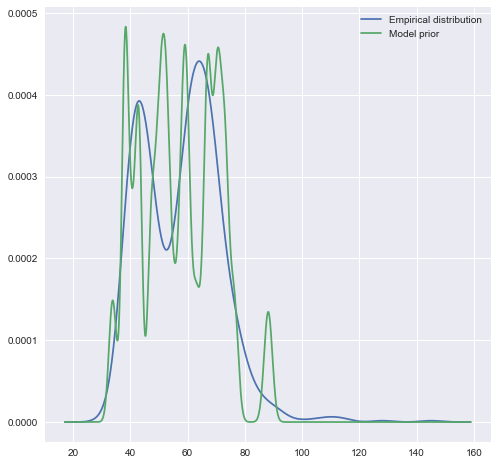

In [66]:
from model.storage import save_pickle

minimum_likelihood = lambda _, likelihoods: likelihoods.argmin()
ml_model, ml_hel_dists, ml_js_divs, ml_maes, ml_likelihoods = learn_by_strat(minimum_likelihood, fraction_observed=1.0)
save_pickle('minimum-likelihood-result', (ml_model, ml_hel_dists, ml_js_divs, ml_maes, ml_likelihoods))

## Compare with same amount of randomly chosen trajectories

In [69]:
from model.environment import train_seg_ids
from tqdm import tqdm
from itertools import islice
from model.storage import load_pickle

def learn(traj_id, seg_n):
    seg = load_seg(train_trajs, seg_n, traj_id)
    normaliser = seg_normalisers[seg_n]
    return learn_model(
        seg, route_n, seg_n, traj_id,
        scaled_f_p_sigma_n, scaled_f_v_sigma_n,
        g_sigma_n, h_sigma_n,
        scaled_delta_xy, scaled_delta_p, scaled_delta_v,
        hyperparams[seg_n],
        n_restarts=3
    )

def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)), ())


seg_ns_to_train = [seg_n] # train_seg_ids
# Batch to avoid memory error
batch_size = 30
already_trained = 0


ml_model, ml_hel_dists, ml_js_divs, ml_maes, ml_likelihoods = load_pickle('minimum-likelihood-result')
mm_model, mm_hel_dists, mm_js_divs, mm_maes, mm_likelihoods = load_pickle('maximum-mae-result')

n_to_train = max(len(mm_model), len(ml_model))
print('leadning {} models'.format(n_to_train))

batches = list(chunk(train_traj_ids[already_trained:already_trained+n_to_train], batch_size))
print(batches)
randomly_chosen_models = []
for seg_n in seg_ns_to_train:
    print('doing segment', seg_n)
    for batch in tqdm(batches):
        batch_models = []
        for traj_n in batch:
            model = learn(traj_n, seg_n)
            randomly_chosen_models.append(model)

leadning 30 models
[(2, 4, 5, 7, 11, 15, 19, 20, 26, 32, 34, 36, 48, 58, 63, 68, 73, 76, 78, 87, 96, 99, 100, 105, 106, 114, 117, 124, 125, 136)]
doing segment 6







  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Optimization restart 1/3, f = -215.72413644632462
Optimization restart 2/3, f = -215.7241364459381
Optimization restart 3/3, f = -215.7241364372503
Optimization restart 1/3, f = -226.33188692755826
Optimization restart 2/3, f = -226.3318869173123
Optimization restart 3/3, f = -226.33188691464366
Optimization restart 1/3, f = -226.3296475628982
Optimization restart 2/3, f = -226.32964757370303
Optimization restart 3/3, f = -226.3296475847664
Optimization restart 1/3, f = -206.77909834557605
Optimization restart 2/3, f = -206.77909834328213
Optimization restart 3/3, f = -206.7790983458702
Optimization restart 1/3, f = -216.38784715075286
Optimization restart 2/3, f = -216.38784715113832
Optimization restart 3/3, f = -216.38784715128602
Optimization restart 1/3, f = -216.3162534346908
Optimization restart 2/3, f = -216.3162534343636
Optimization restart 3/3, f = -216.31625343488187
Optimization restart 1/3, f = -12.985083626214852
Optimization restart 2/3, f = -12.98508362621503
Optimizat

Optimization restart 1/3, f = -206.29362044397698
Optimization restart 2/3, f = -206.29362044398272
Optimization restart 3/3, f = -206.29362044399238
Optimization restart 1/3, f = -204.25081583743736
Optimization restart 2/3, f = -204.2508158369549
Optimization restart 3/3, f = -204.25081583745958
Optimization restart 1/3, f = -205.76054642476637
Optimization restart 2/3, f = -205.7605464262108
Optimization restart 3/3, f = -205.76054642626036
Optimization restart 1/3, f = -456.35289626347367
Optimization restart 2/3, f = -456.34386168181663
Optimization restart 3/3, f = -456.3529652224097
Optimization restart 1/3, f = 90.62613920734498
Optimization restart 2/3, f = 90.62613920733226
Optimization restart 3/3, f = 90.62580832543566
Optimization restart 1/3, f = -172.5167640713971
Optimization restart 2/3, f = -172.51676406698064
Optimization restart 3/3, f = -172.51676406374818
Optimization restart 1/3, f = -177.8376292797923
Optimization restart 2/3, f = -177.83762927487516
Optimizatio

Optimization restart 1/3, f = -231.68852399249255
Optimization restart 2/3, f = -231.68852399284046
Optimization restart 3/3, f = -231.6885239918031
Optimization restart 1/3, f = -10.9714435661642
Optimization restart 2/3, f = -10.971443566164286
Optimization restart 3/3, f = -10.97144356606244
Optimization restart 1/3, f = -10.716894706185247
Optimization restart 2/3, f = -10.716894706184814
Optimization restart 3/3, f = -10.716894706185293
Optimization restart 1/3, f = -11.08400358429336
Optimization restart 2/3, f = -11.08400358429197
Optimization restart 3/3, f = -11.084003584294031
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -236.04075768998035
Optimization restart 2/3, f = -236.0407576899894
Optimization restart 3/3, f = -236.04075768998948
Optimization restart 1/3, f = -231.46883397765822
Optimization restart 2/3, f = -231.46883398345295
Opti

Optimization restart 1/3, f = -135.4271932941251
Optimization restart 2/3, f = -135.4271932940997
Optimization restart 3/3, f = -135.4271932902551
Optimization restart 1/3, f = -139.07092272466528
Optimization restart 2/3, f = -139.0709227137257
Optimization restart 3/3, f = -139.0709227110211
Optimization restart 1/3, f = -139.06712202697577
Optimization restart 2/3, f = -139.06712200621413
Optimization restart 3/3, f = -139.06712200467769
Optimization restart 1/3, f = -143.43534840257504
Optimization restart 2/3, f = -143.4353484007556
Optimization restart 3/3, f = -143.43534839847297
Optimization restart 1/3, f = -147.39146772274756
Optimization restart 2/3, f = -147.39146771400908
Optimization restart 3/3, f = -147.3914677218098
Optimization restart 1/3, f = -147.35419804068178
Optimization restart 2/3, f = -147.35419803884798
Optimization restart 3/3, f = -147.35419804072504
Optimization restart 1/3, f = -50.535004472141566
Optimization restart 2/3, f = -50.535004471576194
Optimiz

 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:overflow encountered in multiply
 C:\Users\sebas\Anaconda3\envs\gpflow\lib\site-packages\GPy\kern\src\stationary.py:454: RuntimeWarning:invalid value encountered in multiply


Optimization restart 2/3, f = 48.99023870371008
Optimization restart 3/3, f = 48.97903497967117
Optimization restart 1/3, f = -149.41638710979282
Optimization restart 2/3, f = -149.41638712610523
Optimization restart 3/3, f = -149.41638710722697
Optimization restart 1/3, f = -154.55521811824184
Optimization restart 2/3, f = -154.55521814979062
Optimization restart 3/3, f = -154.5552181582877
Optimization restart 1/3, f = -154.55150017284072
Optimization restart 2/3, f = -154.55150018128538
Optimization restart 3/3, f = -154.5515001800704
Optimization restart 1/3, f = -167.4817208789271
Optimization restart 2/3, f = -167.48172087577157
Optimization restart 3/3, f = -167.48172087530256
Optimization restart 1/3, f = -174.62324210686032
Optimization restart 2/3, f = -174.62324211176582
Optimization restart 3/3, f = -174.62324210639395
Optimization restart 1/3, f = -174.60240312696098
Optimization restart 2/3, f = -174.60240335954768
Optimization restart 3/3, f = -174.60240335914932
Optimiz

  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -188.3145354984169
Optimization restart 2/3, f = -188.31453549854982
Optimization restart 3/3, f = -188.31453549855317
Optimization restart 1/3, f = -183.27630066466475
Optimization restart 2/3, f = -183.27630066456692
Optimization restart 3/3, f = -183.27630066386368
Optimization restart 1/3, f = -184.32328432924464
Optimization restart 2/3, f = -184.32328432930237
Optimization restart 3/3, f = -184.32328432930603
Optimization restart 1/3, f = -447.7563897599466
Optimization restart 2/3, f = -447.7565004672215
Optimization restart 3/3, f = -447.3538724547543
Optimization restart 1/3, f = 84.71837640113483
Optimization restart 2/3, f = 84.71837639978855
Optimization restart 3/3, f = 84.71837640111669
Optimization restart 1/3, f = -141.446248891321
Optimization restart 2/3, f = -141.44624888992468
Optimization restart 3/3, f = -141.44624888593145
Optimization restart 1/3, f = -145.68356423802393
Optimizatio

Optimization restart 3/3, f = -158.2651045284037
Optimization restart 1/3, f = -158.21933599349092
Optimization restart 2/3, f = -158.21933599193085
Optimization restart 3/3, f = -158.21933599367557
Optimization restart 1/3, f = -49.45650480623899
Optimization restart 2/3, f = -49.456504806283064
Optimization restart 3/3, f = -49.4565048062829
Optimization restart 1/3, f = -49.275279864601984
Optimization restart 2/3, f = -49.27527986448331
Optimization restart 3/3, f = -49.275279864614376
Optimization restart 1/3, f = -49.641585590994424
Optimization restart 2/3, f = -49.641585591089296
Optimization restart 3/3, f = -49.64158559108229
  Mat32.       |  value  |  constraints  |  priors
  variance     |    1.0  |      +ve      |        
  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -169.52213370321897
Optimization restart 2/3, f = -169.52213370303843
Optimization restart 3/3, f = -169.5221337031614
Optimization restart 1/3, f = -160.4558127000863
Optim

Optimization restart 3/3, f = 51.679820175667395
Optimization restart 1/3, f = -166.93262021052126
Optimization restart 2/3, f = -166.93262021233375
Optimization restart 3/3, f = -166.93262021780455
Optimization restart 1/3, f = -171.92559732882714
Optimization restart 2/3, f = -171.9255973361005
Optimization restart 3/3, f = -171.92559734325255
Optimization restart 1/3, f = -171.9241338822853
Optimization restart 2/3, f = -171.92413388173017
Optimization restart 3/3, f = -171.92413388070952
Optimization restart 1/3, f = -198.42535600138865
Optimization restart 2/3, f = -198.42535599743474
Optimization restart 3/3, f = -198.4253559999502
Optimization restart 1/3, f = -208.23088603167804
Optimization restart 2/3, f = -208.23088602431042
Optimization restart 3/3, f = -208.23088603197593
Optimization restart 1/3, f = -208.1898211633745
Optimization restart 2/3, f = -208.18982116487032
Optimization restart 3/3, f = -208.1898211655846
Optimization restart 1/3, f = -0.5405379111530983
Optimi

  lengthscale  |    1.0  |      +ve      |        
Optimization restart 1/3, f = -231.03518710696324
Optimization restart 2/3, f = -231.03518711917968
Optimization restart 3/3, f = -231.0351871194583
Optimization restart 1/3, f = -235.0717318512915
Optimization restart 2/3, f = -235.0717318512714
Optimization restart 3/3, f = -235.0717318510136
Optimization restart 1/3, f = -234.8976817536188
Optimization restart 2/3, f = -234.89768175361496
Optimization restart 3/3, f = -234.8976817536868
Optimization restart 1/3, f = -473.8395034588757
Optimization restart 2/3, f = -473.8395048172679
Optimization restart 3/3, f = -473.81187728827354
Optimization restart 1/3, f = 56.274000797232645
Optimization restart 2/3, f = 56.2138609676048
Optimization restart 3/3, f = 60.00493664478645
Optimization restart 1/3, f = -194.37260322171028
Optimization restart 2/3, f = -194.37260322956521
Optimization restart 3/3, f = -194.3726032259805
Optimization restart 1/3, f = -202.3497511826164
Optimization re






100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [03:20<00:00, 200.52s/it]






hellinger divergence 0.08933436425054996
js divergence 0.07546399699878449


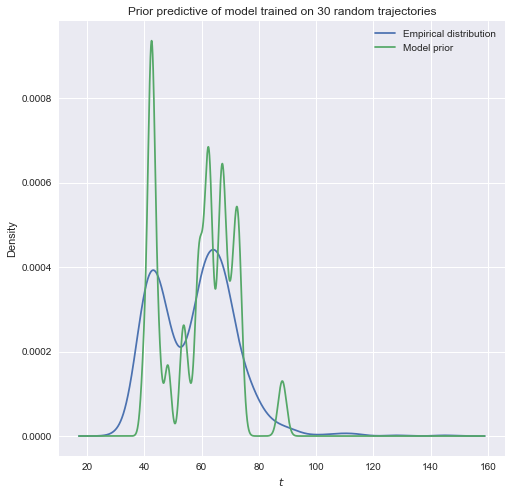

In [70]:
from model.storage import load_pickle
from model.seg_model import SegmentModel, prior_density_from_params

random_traj_model = SegmentModel(
    route_n=3, seg_n=seg_n, 
    trajectory_models=randomly_chosen_models
)

model_prior_params = random_traj_model.arrival_time_prior()
prior_distribution = prior_density_from_params(xx, model_prior_params)

_, ax = plot_grid(1, 1)
ax.plot(xx, empirical_distribution, label='Empirical distribution')
ax.plot(xx, prior_distribution, label='Model prior')
ax.set_title('Prior predictive of model trained on {} random trajectories'.format(len(random_traj_model)))
ax.set_xlabel(r'$t$')
ax.set_ylabel('Density')
ax.legend()
randomly_trained_model_hellinger = hellinger2(empirical_distribution, prior_distribution)
randomly_trained_js_div = js_divergence(empirical_distribution, prior_distribution)
print('hellinger divergence', randomly_trained_model_hellinger)
print('js divergence', randomly_trained_js_div)

In [41]:
ml_likelihoods.shape

(25, 100)

In [105]:
from model.plotting import plot_grid
from model.experiments import seg_travel_times, grid_for
from model.seg_model import prior_density_from_params
from model.storage import load_pickle
from model.plotting import FONT_SIZE

from IPython.display import display, clear_output, set_matplotlib_formats

set_matplotlib_formats('pdf', quality=90)

_, axs = plot_grid(2, 2)
ax1 = axs[0, 0]
ax2 = axs[0, 1]
ax3 = axs[1, 0]
ax4 = axs[1, 1]


ml_model, ml_hel_dists, ml_js_divs, ml_maes, ml_likelihoods = load_pickle('minimum-likelihood-result')
#mm_model, mm_hel_dists, mm_js_divs, mm_maes, mm_likelihoods = load_pickle('maximum-mae-result')

n_models = len(ml_model)-1
ml_grid = list(range(n_models))
mm_grid = list(range(len(mm_models)))
#ax1.plot(grid, js_divs.reshape(-1)[:limit_models], label='JS divergence')
ax1.plot(ml_grid, ml_hel_dists.reshape(-1), label=r'Hellinger$^2$ for {} models by min LL'.format(n_models))
ax1.plot(mm_grid, mm_hel_dists.reshape(-1), label=r'Hellinger$^2$ for {} models by max MAE'.format(n_models))
ax1.plot(grid, np.repeat(randomly_trained_model_hellinger, len(grid)), 
         label=r'Hellinger$^2$' + ' for {} random models'.format(n_models))
ax1.set_xlabel('Models trained', fontsize=FONT_SIZE-2)
ax1.set_ylabel('Divergence', fontsize=FONT_SIZE-2)
ax1.set_title('Helllinger divergence during training', fontsize=FONT_SIZE)
ax1.legend()

#ax1.plot(grid, np.repeat(randomly_trained_js_div, len(grid)), label='Baseline JS divergence')
ax2.plot(ml_grid, ml_maes.max(axis=1), label='Max MAE')
ax2.plot(ml_grid, ml_maes.mean(axis=1), label='Mean MAE')
ax2.set_xlabel('Models trained', fontsize=FONT_SIZE-2)
ax2.set_ylabel('MAE (s)', fontsize=FONT_SIZE-2)
ax2.set_title('MAE during training', fontsize=FONT_SIZE)
ax2.legend()

ax3.plot(ml_grid, ml_likelihoods.min(axis=1), label='Min likelihood')
ax3.plot(ml_grid, ml_likelihoods.mean(axis=1), label='Mean likelihood')
ax3.set_xlabel('Models trained', fontsize=FONT_SIZE-2)
ax3.set_ylabel('Likelihood', fontsize=FONT_SIZE-2)
ax3.set_title('Likelihood during trainig', fontsize=FONT_SIZE)
ax3.legend()

seg = train_trajs[train_trajs.seg == seg_n]
traj_ids = seg.traj.unique()[:n_trajs_to_use]
time_lefts = seg_travel_times(seg)
xx = grid_for(time_lefts, grid_resolution=10000)


model_prior_params = random_traj_model.arrival_time_prior()
random_prior_density = prior_density_from_params(xx, model_prior_params)
selected_prior_density = prior_density_from_params(xx, ml_model.arrival_time_prior())

ax4.plot(xx, empirical_distribution, label='Empirical distribution')
ax4.plot(xx, selected_prior_density, label='Selected models prior')
ax4.plot(xx, random_prior_density, label='Random models prior')
ax4.set_xlabel(r'$t$', fontsize=FONT_SIZE-2)
ax4.set_ylabel('Density', fontsize=FONT_SIZE-2)
ax4.set_title('Prior densities after training', fontsize=FONT_SIZE)
ax4.legend()

NameError: name 'mm_models' is not defined

<Figure size 1152x1152 with 4 Axes>